# Installation Basics

Get [Anaconda](https://anaconda.org/)  
https://anaconda.org/

make sure that everything is up to date:  
`conda update conda`  
`conda update --all`

add pydotplus:  
`conda install -c conda-forge pydotplus`

Start jupyter notebook:  
In a terminal type  
`jupyter notebook`

## First Data
A great place to find all kinds of publicly available data and Machine Learning techniques applied to them is kaggle:  
https://www.kaggle.com/

As a gentle introduction to Data Science we'll start by trying to predict who survived the sinking of the Titanic:  
https://www.kaggle.com/c/titanic


In [1]:
# import some packages first

import numpy as np # linear algebra
import pandas as pd # data manipulation

# to make cool plots
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image

import re # for regex searches

# the machine learning stuff

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import pydotplus

In [2]:
# load train and test data into pandas DataFrames
train = pd.read_csv('TitanicData/train.csv')
test = pd.read_csv('TitanicData/test.csv')

## Exploratory data analysis
Let's have a look at the data to get a basic understanding of what's in there

In [4]:
# size and shape of the data sets
print('Dimensions of train: ', train.shape)
print('Dimensions of test: ', test.shape)

Dimensions of train:  (891, 12)
Dimensions of test:  (418, 11)


In [5]:
# names of columns
print(list(train.columns.values))
print(list(test.columns.values))

# data types of columns
print(train.dtypes)

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


for an explanation of those columns see:  
https://www.kaggle.com/c/titanic/data

In [6]:
# let's have a look at the first ten lines of train:

train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
print('Any missing values?')
print('In train: ', train.isnull().values.any())
#print('In test:  ', test.isnull().values.any())

Any missing values?
In train:  True


In [9]:
# which columns in train have how many missing values

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# Unfortunately, way too many cabin numbers are missing
# Let's drop this column
train = train.drop('Cabin', axis=1)
test = test.drop('Cabin', axis=1)

In [11]:
# some basic statistics
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


a few insights already emerge:  
probability to survive was only 38%  
average age of passengers 30  
average Pclass 2.3, i.e. most passengers where travelling in third class
largest group: a family of eight

In [12]:
# summmary of survival by sex

pd.crosstab(train.Sex, train.Survived, margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


males were much more likely to die

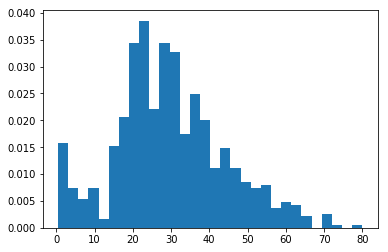

In [13]:
# histograms of ages
plt.hist(train['Age'].dropna(), 30, density=True)
plt.show()

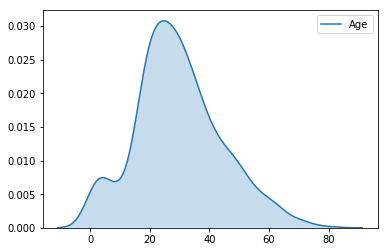

In [14]:
# density distribution of ages
sns.kdeplot(train['Age'].dropna(), shade=True)
plt.show()

/Users/mpluemacher/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


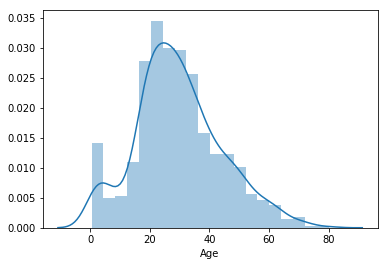

In [15]:
# combine the two
sns.distplot(train['Age'].dropna())
plt.show()

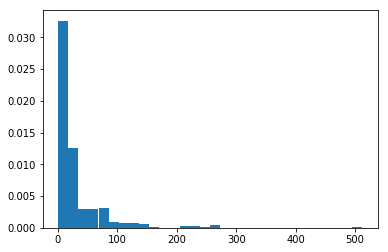

In [16]:
# histograms of fares
plt.hist(train['Fare'], 30, density=True)
plt.show()

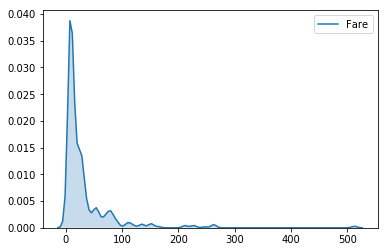

In [17]:
# density distribution of Fares
sns.kdeplot(train['Fare'], shade=True)
plt.show()

/Users/mpluemacher/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


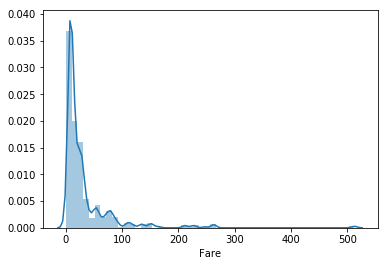

In [18]:
# combine the two
sns.distplot(train['Fare'])
plt.show()

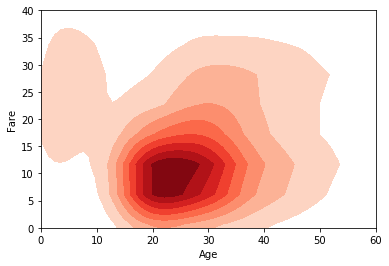

In [21]:
# any correlation between age and fare?

sns.kdeplot(train.dropna().Age, train.dropna().Fare,
                 cmap="Reds", shade=True, shade_lowest=False)
plt.xlim(0,60)
plt.ylim(0,40)
plt.show()

Both Age and Fare have plenty of zero entries!  
That's definitely fishy and a clear sign of issues with the data quality

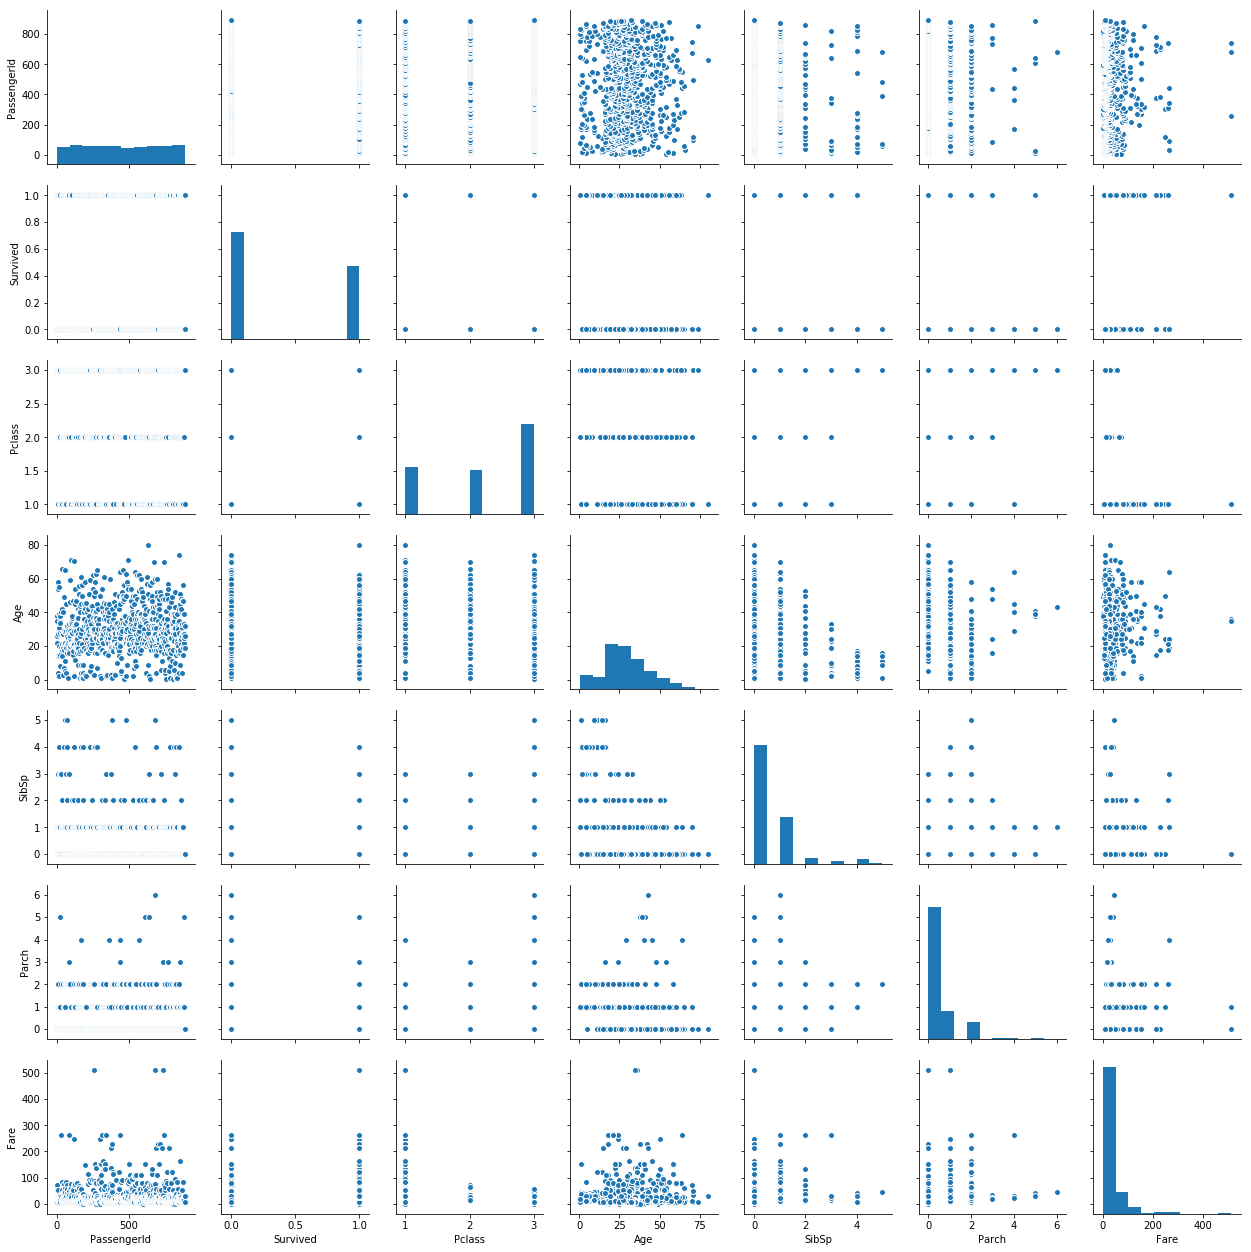

In [22]:
sns.pairplot(train.dropna())
plt.show()

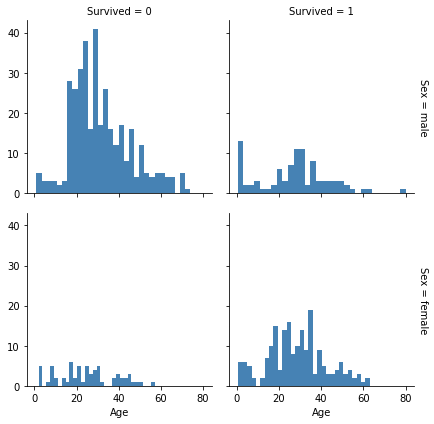

In [23]:
# age distribution of those who died or survived separated by sex
g = sns.FacetGrid(train.dropna(), row="Sex", col="Survived", 
                  margin_titles=True)
bins = 30 
g.map(plt.hist, "Age", color="steelblue", bins=bins, lw=0)

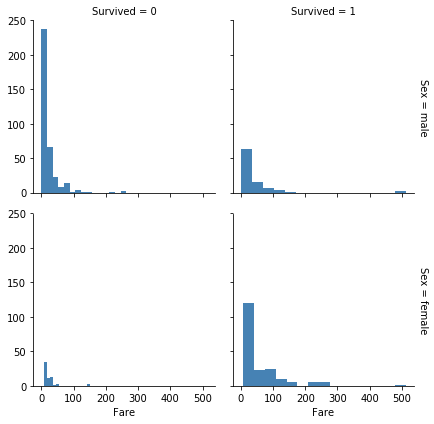

In [24]:
# Fare distribution of those who died or survived separated by sex
g = sns.FacetGrid(train.dropna(), row="Sex", col="Survived", margin_titles=True)
bins = 15 
g.map(plt.hist, "Fare", color="steelblue", bins=bins, lw=0)

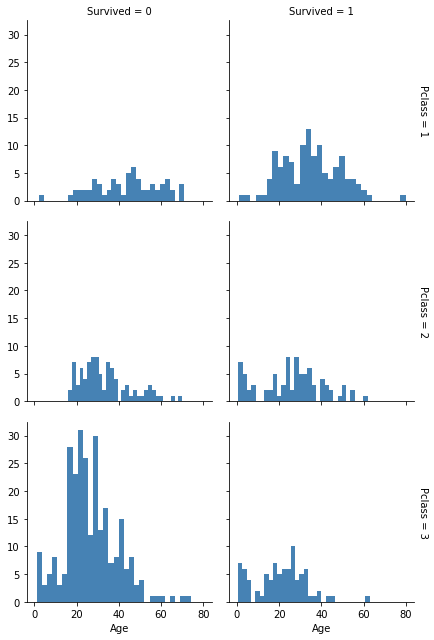

In [25]:
# age distribution of those who died or survived separated by booking class
g = sns.FacetGrid(train.dropna(), row="Pclass", col="Survived", margin_titles=True)
bins = 30 
g.map(plt.hist, "Age", color="steelblue", bins=bins, lw=0)

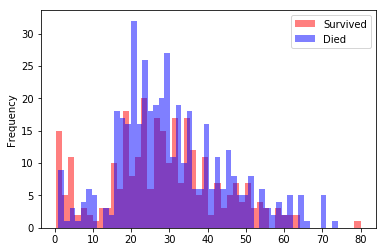

In [26]:
survived = train[train["Survived"] == 1]
died = train[train["Survived"] == 0]
survived["Age"].plot.hist(alpha=0.5,color='red',bins=50)
died["Age"].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['Survived','Died'])
plt.show()

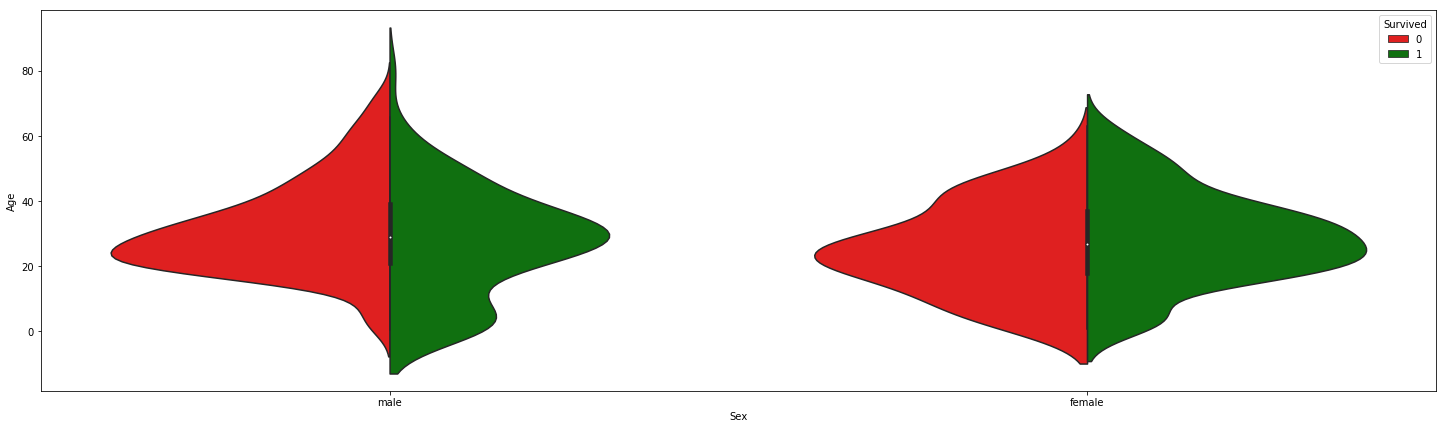

In [27]:
fig = plt.figure(figsize=(25, 7))
sns.violinplot(x='Sex', y='Age', 
               hue='Survived', data=train, 
               split=True,
               palette={0: "r", 1: "g"}
              );
plt.show()

## Data preprocessing
We'll have to transform the data into something that a Machine Learning model can actually utilze.  

The Name column doesn't look particularly useful

In [24]:
train['Name'].head(30)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

However, a title is always part of the name. That's a potentially interesting feature! Let's extract the titles

In [25]:
# A function to get the title from a name.
def get_title(name):
    # Use a regular expression to search for a title.  
    # Titles always consist of capital and lowercase letters, and end with a period.
    title_search = re.search(' ([A-Za-z]+)\.', name)
    #If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

#Get all the titles and print how often each one occurs.
titles = train["Name"].apply(get_title)
print(pd.value_counts(titles))

#Add in the title column.
train["Title"] = titles

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Sir           1
Don           1
Mme           1
Ms            1
Countess      1
Capt          1
Jonkheer      1
Lady          1
Name: Name, dtype: int64


Very rare titles are fairly useless and should be replaced. This is a bit tricky.  
Given that the sinking occured in 1912 we'll assume that all officers, reverends and Dr. are male. Also, we'll assume that all female members of the nobility are married

In [26]:
Title_Dictionary = {
    'Capt': 'Mr',
    'Col': 'Mr',
    'Major': 'Mr',
    'Jonkheer': 'Mr',
    'Don': 'Mr',
    'Sir' : 'Mr',
    'Dr': 'Mr',
    'Rev': 'Mr',
    'Countess': 'Mrs',
    'Mme': 'Mrs',
    'Mlle': 'Miss',
    'Ms': 'Mrs',
    'Mr' : 'Mr',
    'Mrs' : 'Mrs',
    'Miss' : 'Miss',
    'Master' : 'Master',
    'Lady' : 'Mrs'
}

train['Title'] = train.Title.map(Title_Dictionary)

print(pd.value_counts(train['Title']))

Mr        538
Miss      184
Mrs       129
Master     40
Name: Title, dtype: int64


In [27]:
# does everybody have a title now?

print(train.Title.isnull().values.any())

False


Having successfully extracted the title we can drop the name column

In [28]:
train = train.drop('Name', axis=1)

In [29]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,S,Mr


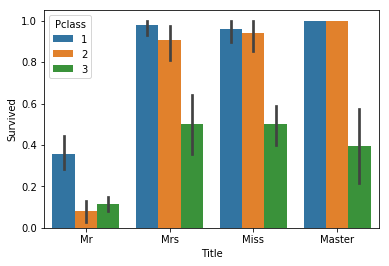

In [30]:
sns.barplot(x="Title", y="Survived", hue="Pclass", data=train);
plt.show()

/Users/mpluemacher/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/Users/mpluemacher/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


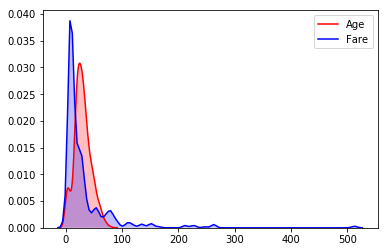

In [31]:
p1=sns.kdeplot(train['Age'], shade=True, color="r")
p1=sns.kdeplot(train['Fare'], shade=True, color="b")
plt.show()

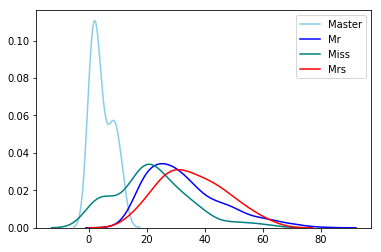

In [32]:


sns.kdeplot( train.loc[train['Title'] == 'Master']['Age'].dropna() ,
                 color="skyblue", label="Master")
sns.kdeplot( train.loc[train['Title'] == 'Mr']['Age'].dropna() ,
                 color="blue", label="Mr")
sns.kdeplot( train.loc[train['Title'] == 'Miss']['Age'].dropna() ,
                 color="teal", label="Miss")
sns.kdeplot( train.loc[train['Title'] == 'Mrs']['Age'].dropna() ,
                 color="red", label="Mrs")
plt.legend()
plt.show()

In [33]:
# coming back to the missing values

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Title            0
dtype: int64

In [34]:
# one common strategy is to replace missing numerical values by the median
# For the age we'll do it for each Title category separately

MasterMedianAge = train.loc[train['Title'] == 'Master']['Age'].median()
MrMedianAge = train.loc[train['Title'] == 'Mr']['Age'].median()
MissMedianAge = train.loc[train['Title'] == 'Miss']['Age'].median()
MrsMedianAge = train.loc[train['Title'] == 'Mrs']['Age'].median()

print(MasterMedianAge)
print(MrMedianAge)
print(MissMedianAge)
print(MrsMedianAge)

3.5
30.0
21.0
35.0


In [35]:
# filter by title
mask = train['Title'] == 'Master'
# row indices of Master with no age
IndexList = train[ (mask) & (train['Age'].isnull()) ].index.tolist()
# replace NaN by corresponding median
train.loc[IndexList, 'Age'] = MasterMedianAge

# and the same for Mr, Miss and Mrs
mask = train['Title'] == 'Mr'
# row indices of Master with no age
IndexList = train[ (mask) & (train['Age'].isnull()) ].index.tolist()
# replace NaN by corresponding median
train.loc[IndexList, 'Age'] = MrMedianAge

mask = train['Title'] == 'Miss'
# row indices of Master with no age
IndexList = train[ (mask) & (train['Age'].isnull()) ].index.tolist()
# replace NaN by corresponding median
train.loc[IndexList, 'Age'] = MissMedianAge

mask = train['Title'] == 'Mrs'
# row indices of Master with no age
IndexList = train[ (mask) & (train['Age'].isnull()) ].index.tolist()
# replace NaN by corresponding median
train.loc[IndexList, 'Age'] = MrsMedianAge

In [36]:
# coming back to the missing values

train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
Title          0
dtype: int64

In [37]:
# what to do with the two missing embarcation points?
 
train.groupby('Embarked').count()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title
Embarked,,,,,,,,,,
C,168,168,168,168,168,168,168,168,168,168
Q,77,77,77,77,77,77,77,77,77,77
S,644,644,644,644,644,644,644,644,644,644


In [38]:
# most passengers boarded in Southampton, so we'll just fill the two missing values with 'S'

train = train.fillna('S')

In [39]:
# coming back to the missing values

train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64

In [40]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,S,Mr
5,6,0,3,male,30.0,0,0,330877,8.4583,Q,Mr
6,7,0,1,male,54.0,0,0,17463,51.8625,S,Mr
7,8,0,3,male,2.0,3,1,349909,21.0750,S,Master
8,9,1,3,female,27.0,0,2,347742,11.1333,S,Mrs
9,10,1,2,female,14.0,1,0,237736,30.0708,C,Mrs


Clearly, the ticket number could also contain potentially important information.  
For simplicity, we'll drop it in this first investigation.

In [41]:
train = train.drop('Ticket', axis=1)

In [42]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,7.2500,S,Mr
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,female,26.0,0,0,7.9250,S,Miss
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,male,35.0,0,0,8.0500,S,Mr
5,6,0,3,male,30.0,0,0,8.4583,Q,Mr
6,7,0,1,male,54.0,0,0,51.8625,S,Mr
7,8,0,3,male,2.0,3,1,21.0750,S,Master
8,9,1,3,female,27.0,0,2,11.1333,S,Mrs
9,10,1,2,female,14.0,1,0,30.0708,C,Mrs


In [43]:
# data types of columns
print(train.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
Title           object
dtype: object


Clearly, Survived and Pclass are not to be interpreted as numerical features, but rather as categorical ones.  

Machine Learning algorithms usually need numerical values to work with...

Solution: one-hot encoding

In [44]:
# transform Pclass column into dummy variables

pd.get_dummies(train['Pclass'], prefix='class').head(10)

,class_1,class_2,class_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
5,0,0,1
6,1,0,0
7,0,0,1
8,0,0,1
9,0,1,0


In [45]:
# can you see why one column is redundant?

# one-hot encoding: drop first column

pd.get_dummies(train['Pclass'], prefix='class', drop_first=True).head(10)

,class_2,class_3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
5,0,1
6,0,0
7,0,1
8,0,1
9,1,0


In [46]:
# create the various dummy variables

class_dummies = pd.get_dummies(train['Pclass'], prefix='class', drop_first=True)
sex_dummies = pd.get_dummies(train['Sex'], drop_first=True)
port_dummies = pd.get_dummies(train['Embarked'], prefix='port', drop_first=True)
title_dummies = pd.get_dummies(train['Title'], drop_first=True)

In [47]:
# add dummies to the original dataframe

train = pd.concat([train, class_dummies, sex_dummies, port_dummies, title_dummies],axis=1)

# and get rid of the original columns

train = train.drop('Pclass', axis=1)
train = train.drop('Sex', axis=1)
train = train.drop('Embarked', axis=1)
train = train.drop('Title', axis=1)

# what are we left with?
train.head(10)

,PassengerId,Survived,Age,SibSp,Parch,Fare,class_2,class_3,male,port_Q,port_S,Miss,Mr,Mrs
0,1,0,22.0,1,0,7.2500,0,1,1,0,1,0,1,0
1,2,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,1
2,3,1,26.0,0,0,7.9250,0,1,0,0,1,1,0,0
3,4,1,35.0,1,0,53.1000,0,0,0,0,1,0,0,1
4,5,0,35.0,0,0,8.0500,0,1,1,0,1,0,1,0
5,6,0,30.0,0,0,8.4583,0,1,1,1,0,0,1,0
6,7,0,54.0,0,0,51.8625,0,0,1,0,1,0,1,0
7,8,0,2.0,3,1,21.0750,0,1,1,0,1,0,0,0
8,9,1,27.0,0,2,11.1333,0,1,0,0,1,0,0,1
9,10,1,14.0,1,0,30.0708,1,0,0,0,0,0,0,1


In [48]:
# passengerID was introduced by kaggle for the competition, it contains no information, drop it as well

train = train.drop('PassengerId', axis=1)

# what are we left with?
train.head(10)

,Survived,Age,SibSp,Parch,Fare,class_2,class_3,male,port_Q,port_S,Miss,Mr,Mrs
0,0,22.0,1,0,7.2500,0,1,1,0,1,0,1,0
1,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,1
2,1,26.0,0,0,7.9250,0,1,0,0,1,1,0,0
3,1,35.0,1,0,53.1000,0,0,0,0,1,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1,0,1,0
5,0,30.0,0,0,8.4583,0,1,1,1,0,0,1,0
6,0,54.0,0,0,51.8625,0,0,1,0,1,0,1,0
7,0,2.0,3,1,21.0750,0,1,1,0,1,0,0,0
8,1,27.0,0,2,11.1333,0,1,0,0,1,0,0,1
9,1,14.0,1,0,30.0708,1,0,0,0,0,0,0,1


## Model Building
Finally, we have gotten the data in a form we can work with.  
On to machine learning!

In [49]:
# we start by splitting our data set into a training and a testing set
# the label is what we are trying to predict, the features are used for the prediction

features = list(train.columns.values)
label = 'Survived'

features.remove(label)

print(features)

['Age', 'SibSp', 'Parch', 'Fare', 'class_2', 'class_3', 'male', 'port_Q', 'port_S', 'Miss', 'Mr', 'Mrs']


In [50]:
all_X = train[features]
all_y = train[label]

train_X, test_X, train_y, test_y = train_test_split(
    all_X, all_y, test_size=0.20, random_state=0)

In [51]:
# size and shape of the data sets
print('Dimensions of train: ', train_X.shape, ' ', train_y.shape)
print('Dimensions of test: ', test_X.shape, ' ', test_y.shape)


Dimensions of train:  (712, 12)   (712,)
Dimensions of test:  (179, 12)   (179,)


In [52]:
# as a first example consider a simple logistic regression
# https://en.wikipedia.org/wiki/Logistic_regression
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

lr = LogisticRegression()
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)

In [53]:
# how did we do?
# accuracy: percentage of correct predictions

accuracy = accuracy_score(test_y, predictions)

print(accuracy)

0.8156424581005587


In [54]:
cf = confusion_matrix(test_y, predictions)

print(cf)

[[96 14]
 [19 50]]


In [55]:
# true positives, etc

tn, fp, fn, tp = cf.ravel()
print('True positives: ', tp)
print('True negatives: ', tn)
print('False positives: ', fp)
print('False negatives: ', fn)

True positives:  50
True negatives:  96
False positives:  14
False negatives:  19


In [56]:
# precision, recall and f1 score
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html
# high precision -> low false positive rate
# high recall -> low false negative rate

precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1 = 2 * precision * recall / ( precision + recall )

print('Precision: ', precision)
print('Recall: ', recall)
print('f1: ', f1)

Precision:  0.78125
Recall:  0.7246376811594203
f1:  0.7518796992481203


In [75]:
# next example: decision tree
# http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

DTree = DecisionTreeClassifier(criterion='entropy', 
                               max_depth=5,
                               min_samples_split=20,
                               min_samples_leaf=5)

DTree.fit(train_X, train_y)

predictions = DTree.predict(test_X)

In [76]:
# how did we do?
# accuracy: percentage of correct predictions

accuracy = accuracy_score(test_y, predictions)

print(accuracy)

0.8044692737430168


In [77]:
cf = confusion_matrix(test_y, predictions)

print(cf)

[[99 11]
 [24 45]]


In [78]:
# true positives, etc

tn, fp, fn, tp = cf.ravel()
print('True positives: ', tp)
print('True negatives: ', tn)
print('False positives: ', fp)
print('False negatives: ', fn)

True positives:  45
True negatives:  99
False positives:  11
False negatives:  24


In [79]:
# precision, recall and f1 score

precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1 = 2 * precision * recall / ( precision + recall )

print('Precision: ', precision)
print('Recall: ', recall)
print('f1: ', f1)

Precision:  0.8035714285714286
Recall:  0.6521739130434783
f1:  0.7200000000000001


In [80]:
# visualize tree structure

dot_data = export_graphviz(DTree, 
                           out_file=None,
                           feature_names=features,
                           class_names='Survived',
                           filled=True, 
                           rounded=True,
                           special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)

graph.write_pdf('./dt-titanic.pdf')

True

In [81]:
list(zip(DTree.feature_importances_,features))

[(0.03714060094557347, 'Age'),
 (0.0, 'SibSp'),
 (0.011407330082476472, 'Parch'),
 (0.21857798226566694, 'Fare'),
 (0.014710907782024728, 'class_2'),
 (0.17121353228795727, 'class_3'),
 (0.0, 'male'),
 (0.010728430987421524, 'port_Q'),
 (0.005847681028178341, 'port_S'),
 (0.0, 'Miss'),
 (0.5178340353845505, 'Mr'),
 (0.012539499236150664, 'Mrs')]

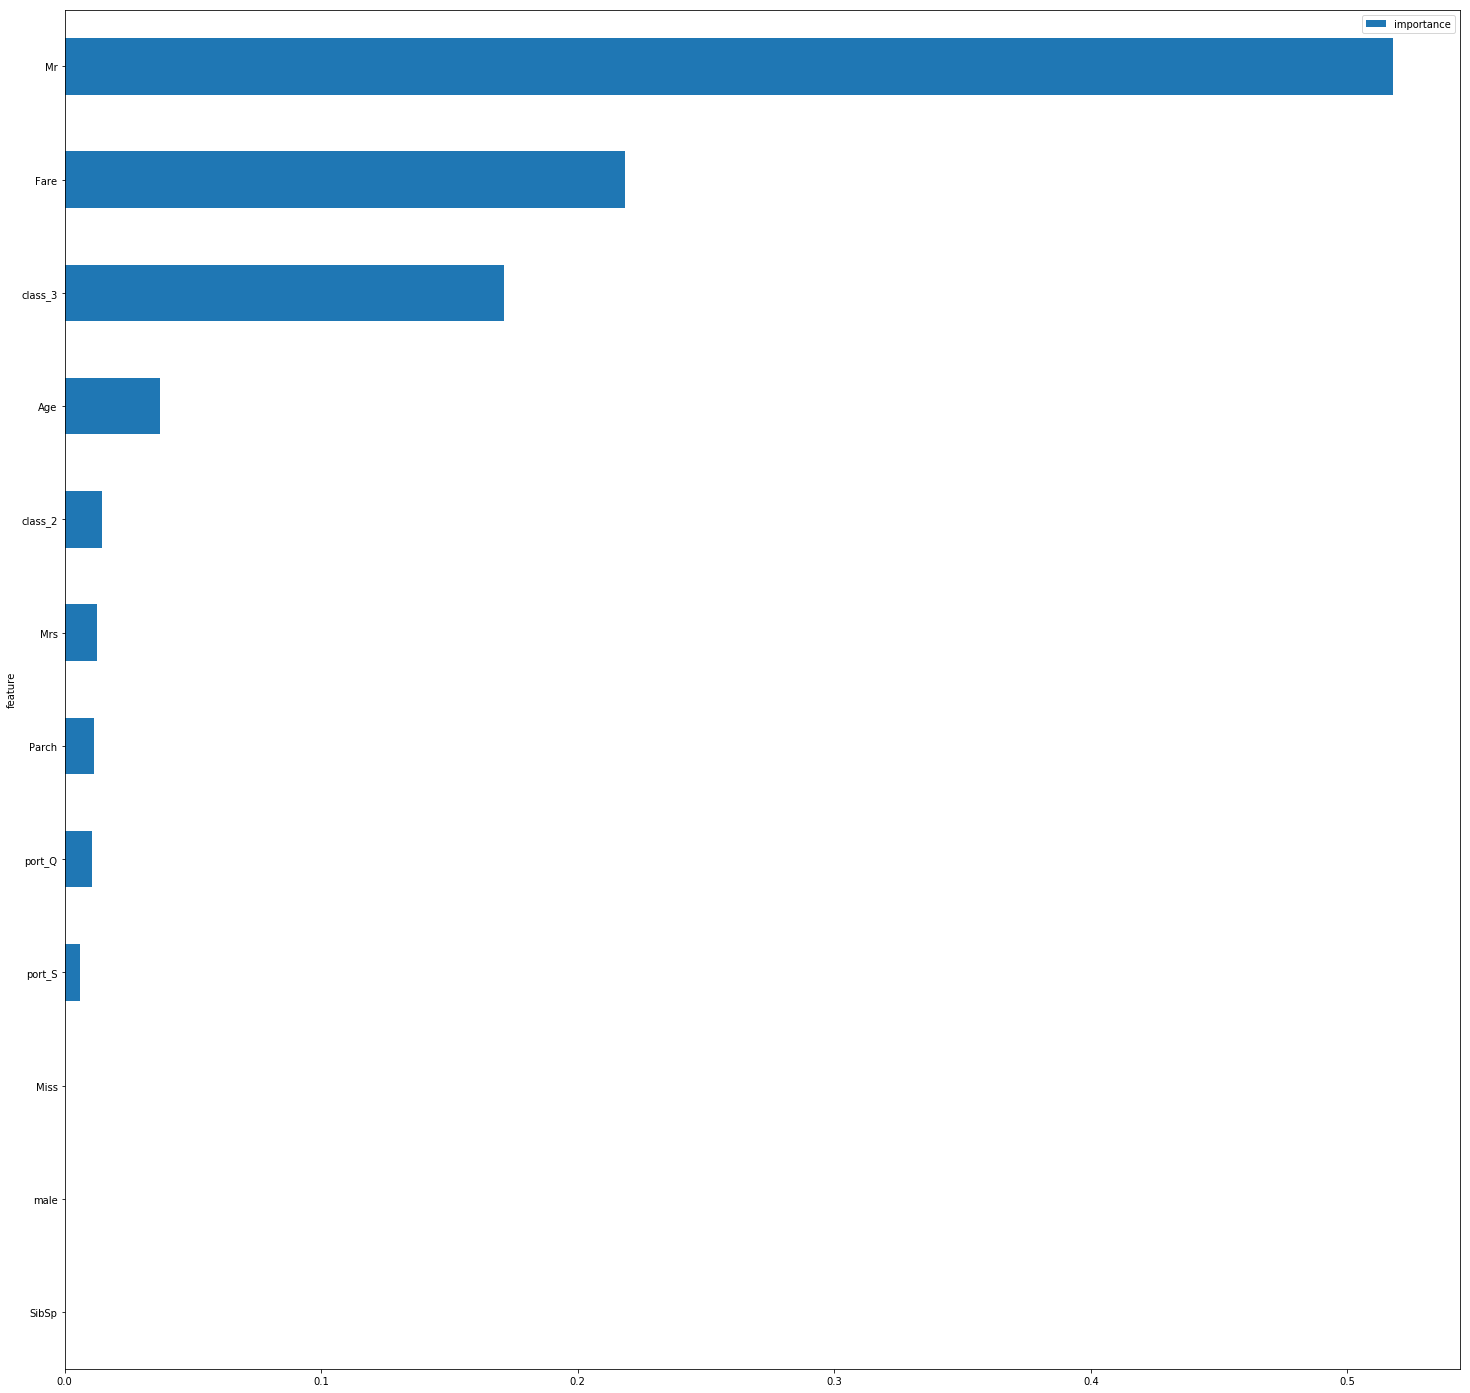

In [82]:
feat = pd.DataFrame()
feat['feature'] = features
feat['importance'] = DTree.feature_importances_
feat.sort_values(by=['importance'], ascending=True, inplace=True)
feat.set_index('feature', inplace=True)

feat.plot(kind='barh', figsize=(25, 25))


In [ ]:
# next steps
# Random Forest
# Gradient Boosting
# Support Vector Machine
# Ada Boost
# Gaussian Naive Bayes
# Quadratic Discriminant Analysis

# Voting Classifier